In [ ]:
#begins section 8.1

In [ ]:
#install needed
!pip install --quiet nltk

In [ ]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#importing and downloading everything at once, may take a few minutes
import nltk
nltk.download("all", quiet=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


True

In [ ]:
#finding some data to use

#https://www.gutenberg.org/

#book search on top bar

#popular, or search The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson

#select Read this book online: HTML

In [ ]:
# Store url
url = "https://www.gutenberg.org/files/43/43-h/43-h.htm"

In [ ]:
# Make the request and check object type
req = requests.get(url)

In [ ]:
type(req)

requests.models.Response

In [ ]:
# Extract HTML from Response object and print
html = req.text

In [ ]:
print(html)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson</title>

<style type="text/css">


body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify }

p {text-indent: 1em;
   margin-top: 0.25em;
   margin-bottom: 0.25em; }

h1, h2, h3, h4, h5, h6 {text-align: center; font-style: normal;
font-weight: normal; line-height: 1.5; margin-top: .5em; margin-bottom:
.5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 175%;}
h3 {font-size: 150%;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

p.right {text-align: right;
         mar

In [ ]:
#this might not be ideal...but it is all of the text that we want!

In [ ]:
soup = BeautifulSoup(html, "html5lib")

In [ ]:
type(soup)

bs4.BeautifulSoup

In [ ]:
# Get soup title
soup.title

<title>The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson</title>

In [ ]:
# Get soup title as string
soup.title.string

'The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson'

In [ ]:
#Or all URLs found within a page’s < a > tags (hyperlinks):

# Get hyperlinks from soup and check out first several
soup.findAll('a')[:8]

[<a href="#chap01">STORY OF THE DOOR</a>,
 <a href="#chap02">SEARCH FOR MR. HYDE</a>,
 <a href="#chap03">DR. JEKYLL WAS QUITE AT EASE</a>,
 <a href="#chap04">THE CAREW MURDER CASE</a>,
 <a href="#chap05">INCIDENT OF THE LETTER</a>,
 <a href="#chap06">INCIDENT OF DR. LANYON</a>,
 <a href="#chap07">INCIDENT AT THE WINDOW</a>,
 <a href="#chap08">THE LAST NIGHT</a>]

In [ ]:
# Get the text out of the soup and print it
text = soup.get_text()

In [ ]:
print(text)




The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson




body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify }

p {text-indent: 1em;
   margin-top: 0.25em;
   margin-bottom: 0.25em; }

h1, h2, h3, h4, h5, h6 {text-align: center; font-style: normal;
font-weight: normal; line-height: 1.5; margin-top: .5em; margin-bottom:
.5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 175%;}
h3 {font-size: 150%;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

p.right {text-align: right;
         margin-right: 10%;
         margin-top: 1em;
         margin-bottom: 1em; }

div.fig { display:block;
          margin:0 auto;
          text-align:center; }

a:link {color:blue; text-decoration:none}
a:visited {color:blue; text-decoration:none}
a:hover {color:red}








The Project Gutenberg EBook of The Strange Case Of Dr. Jekyll And Mr. Hyde, by

In [ ]:
#ends section 8.1

In [ ]:
#this begins section 8.2

In [ ]:
# Create tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [ ]:
# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:9]

['The', 'Strange', 'Case', 'Of', 'Dr', 'Jekyll', 'And', 'Mr', 'Hyde']

In [ ]:
# Initialize new list
words = []

In [ ]:
# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())

In [ ]:
# Print several items from list as sanity check
words[:9]

['the', 'strange', 'case', 'of', 'dr', 'jekyll', 'and', 'mr', 'hyde']

In [ ]:
# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
# Initialize new list
words_ns = []

In [ ]:
# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

In [ ]:
# Print several list items as sanity check
words_ns[:7]

['strange', 'case', 'dr', 'jekyll', 'mr', 'hyde', 'robert']

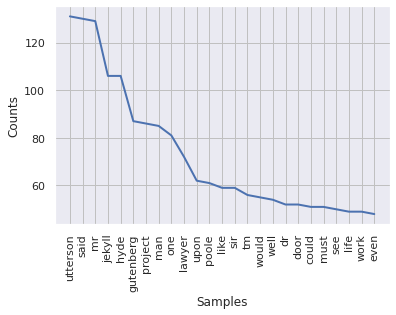

In [ ]:
sns.set(color_codes=True)
# Create freq dist and plot
freqdist = nltk.FreqDist(words_ns)
freqdist.plot(25)

In [ ]:
#this ends section 8.2

In [ ]:
#begins section 8.3

In [ ]:
def plot_words_frequency(url):
    """Takes a url (from Project Gutenberg) and plots a word frequency
    distribution"""
    # Make the request and check object type
    req = requests.get(url)
    # Extract HTML from Response object and print
    html = req.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist = nltk.FreqDist(words_ns)
    freqdist.plot(25)

In [ ]:
#finding some data to use

#https://www.gutenberg.org/

#book search on top bar

#popular, or search something!

#select Read this book online: HTML

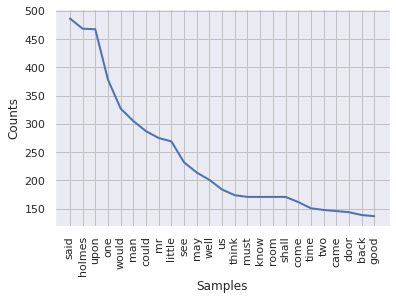

In [ ]:
#The Adventures of Sherlock Holmes
plot_words_frequency("https://www.gutenberg.org/files/1661/1661-h/1661-h.htm")

In [ ]:
#this ends section 8.3

In [ ]:
#this begins section 8.4

In [ ]:
#new imports for this section!

In [ ]:
#install needed
!pip install --quiet nltk

In [ ]:
import random

#importing and downloading everything at once, may take a few minutes
import nltk
nltk.download("all", quiet=True)

True

In [ ]:
documents = [(list(nltk.corpus.movie_reviews.words(fileid)), category)
             for category in nltk.corpus.movie_reviews.categories()
             for fileid in nltk.corpus.movie_reviews.fileids(category)]

In [ ]:
random.shuffle(documents)

In [ ]:
print(documents[0])

(['director', 'andrew', 'davis', 'reworks', 'his', 'fugitive', 'formula', 'and', 'the', 'results', 'are', 'about', 'as', 'exciting', 'as', 'his', 'last', 'film', '--', 'the', 'dreadful', 'comedy', 'steal', 'big', ',', 'steal', 'little', '--', 'was', 'funny', '.', 'keanu', '"', 'i', "'", 'd', 'rather', 'play', 'music', 'than', 'play', 'another', 'action', 'hero', '"', 'reeves', 'is', 'the', 'grad', 'student', 'on', 'the', 'run', ',', 'who', ',', 'along', 'with', 'his', 'superfluous', 'sidekick', '(', 'rachel', 'weisz', ')', ',', 'has', 'been', 'framed', 'for', 'a', 'sabotaged', 'science', 'experiment', 'that', 'vaporized', 'eight', 'chicago', 'city', 'blocks', '.', '(', 'the', 'mushroom', '-', 'cloud', 'explosion', 'is', 'a', 'knock', '-', 'out', 'and', 'easily', 'the', 'best', 'part', 'of', 'the', 'movie', '.', 'or', ',', 'as', 'one', 'audience', 'member', 'succinctly', 'summed', 'it', 'up', ':', '"', 'whoa', '.', '"', ')', 'false', 'information', 'implicates', 'their', 'involvement', 

In [ ]:
all_words = []
for w in nltk.corpus.movie_reviews.words():
    all_words.append(w.lower())

In [ ]:
all_words = nltk.FreqDist(all_words)

In [ ]:
print(all_words.most_common(10))

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]


In [ ]:
print(all_words["bad"])

1395


In [ ]:
print(all_words["okay"])

125


In [ ]:
print(all_words["good"])

2411


In [ ]:
type(all_words)

nltk.probability.FreqDist

In [ ]:
all_words

FreqDist({'plot': 1513,
          ':': 3042,
          'two': 1911,
          'teen': 151,
          'couples': 27,
          'go': 1113,
          'to': 31937,
          'a': 38106,
          'church': 69,
          'party': 183,
          ',': 77717,
          'drink': 32,
          'and': 35576,
          'then': 1424,
          'drive': 105,
          '.': 65876,
          'they': 4825,
          'get': 1949,
          'into': 2623,
          'an': 5744,
          'accident': 104,
          'one': 5852,
          'of': 34123,
          'the': 76529,
          'guys': 268,
          'dies': 104,
          'but': 8634,
          'his': 9587,
          'girlfriend': 218,
          'continues': 88,
          'see': 1749,
          'him': 2633,
          'in': 21822,
          'her': 4522,
          'life': 1586,
          'has': 4719,
          'nightmares': 26,
          'what': 3322,
          "'": 30585,
          's': 18513,
          'deal': 219,
          '?': 3771,
          'wa

In [ ]:
#this ends section 8.4

In [ ]:
#this begins section 8.5

In [ ]:
#rerun everything from section 8.4

In [ ]:
#build a quick function that will find these top 2500 words in our positive and negative documents, marking their presence as either positive or negative:
word_features = list(all_words.keys())[:2500]

In [ ]:
#assigning our word features to each movie review in (documents)
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [ ]:
#Then we can do this for all of our documents, saving the feature existence booleans and their respective positive or negative categories by doing:
featuresets = [(find_features(rev), category) for (rev, category) in documents]

In [ ]:
#this ends section 8.5

In [ ]:
#this begins section 8.6

In [ ]:
#rerun everything from section 8.4 and 8.5

In [ ]:
#looking at length of feature sets
len(featuresets)

2000

In [ ]:
#we can train with 75%, and save 25% for testing
# set that we'll train our classifier with
trainer = featuresets[:1500]

# set that we'll test against.
tester = featuresets[1500:]

In [ ]:
#defining our classifier as Naive Bayes Classifier
classifier = nltk.NaiveBayesClassifier.train(trainer)

In [ ]:
#testing out our accuracy!
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, tester))*100)

Classifier accuracy percent: 84.39999999999999


In [ ]:
#Next, we can take it a step further to see what the most valuable words are when it comes to positive or negative reviews:
classifier.show_most_informative_features(20)

Most Informative Features
                everyday = True              pos : neg    =     11.7 : 1.0
                 frances = True              pos : neg    =      8.4 : 1.0
                  regard = True              pos : neg    =      8.4 : 1.0
                  annual = True              pos : neg    =      8.4 : 1.0
                  turkey = True              neg : pos    =      7.8 : 1.0
                    skip = True              neg : pos    =      6.3 : 1.0
                goldblum = True              neg : pos    =      6.3 : 1.0
           unimaginative = True              neg : pos    =      6.3 : 1.0
                  wasted = True              neg : pos    =      6.2 : 1.0
               atrocious = True              neg : pos    =      6.2 : 1.0
                  suvari = True              neg : pos    =      5.7 : 1.0
                  shoddy = True              neg : pos    =      5.7 : 1.0
                    mena = True              neg : pos    =      5.7 : 1.0

In [ ]:
#the above is going to vary again for each person, but you should see something like

#What this tells you is the ratio of occurences in negative to positive, or visa versa, for every word. 
#So here, we can see that the term "insulting" appears 10.6 more times as often in negative reviews as it does in positive reviews. Ludicrous, 10.1.

In [ ]:
#this ends section 8.6

In [ ]:
#this begins section 8.7

In [ ]:
#lets compare similarity among text from a few different works from Gutenberg

In [77]:
#install needed
!pip install --quiet nltk

In [78]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

#importing and downloading everything at once, may take a few minutes
import nltk
nltk.download("all", quiet=True)

True

In [ ]:
#finding some data to use

#https://www.gutenberg.org/

#book search on top bar

#popular, or search The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson

#select Read this book online: HTML

In [79]:
# Store urls
#The Strange Case of Dr. Jekyll and Mr. Hyde
url1 = "https://www.gutenberg.org/files/43/43-h/43-h.htm"

#Sherlock Holmes
url2 = "https://www.gutenberg.org/files/1661/1661-h/1661-h.htm"

#Frankenstein; Or, The Modern Prometheus
url3 = "https://www.gutenberg.org/files/84/84-h/84-h.htm"

#Dracula by Bram Stoker
url4 = "https://www.gutenberg.org/files/345/345-h/345-h.htm"

In [80]:
def clean_word_list(url):
    """Takes a url (from Project Gutenberg) and plots a word frequency
    distribution"""
    # Make the request and check object type
    req = requests.get(url)
    # Extract HTML from Response object and print
    html = req.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = nltk.tokenize.RegexpTokenizer('\w')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)

    return words_ns

In [81]:
#using our definition to get our cleaned up lists for each url/text
clean1 = clean_word_list(url1)

clean2 = clean_word_list(url2)

clean3 = clean_word_list(url3)

clean4 = clean_word_list(url4)

In [84]:
clean1[:10]

['h', 'e', 'r', 'n', 'g', 'e', 'c', 'e', 'f', 'r']

In [85]:
#As we didn’t passed any delimiter, so by default a white space character was used as separator.
def list_to_string(org_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
    return seperator.join(org_list)

In [86]:
# convert our lists into strings!
string1 = list_to_string(clean1, ',')

string2 = list_to_string(clean2, ',')

string3 = list_to_string(clean3, ',')

string4 = list_to_string(clean4, ',')

In [88]:
string1[:10]

'h,e,r,n,g,'

In [89]:
#now to build up our doc library...aka a list of strings

doc_lib = [string1, string2, string3, string4]

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVec = TfidfVectorizer(tokenizer, stop_words='english')

In [91]:
def cos_similarity(textlist):
    tfidf = TfidfVec.fit_transform(textlist)
    return (tfidf * tfidf.T).toarray()

In [92]:
stored=cos_similarity(doc_lib)

ValueError: ignored

In [ ]:
names=['First Book','Second Book','Third Book','Fourth Book']

In [ ]:
visual = pd.DataFrame(stored, index=names, columns=names)

In [ ]:
print ("Cosine Similarity Matrix")
visual

Cosine Similarity Matrix


,First Book,Second Book,Third Book,Fourth Book
First Book,1.000000,0.448150,0.392530,0.438045
Second Book,0.448150,1.000000,0.435202,0.555319
Third Book,0.392530,0.435202,1.000000,0.502391
Fourth Book,0.438045,0.555319,0.502391,1.000000
